In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


Exception: Cannot find lightgbm library file in following paths:
C:\Users\srodriguezb\Anaconda3\envs\introds\Lib\site-packages\fairgbm\lib_lightgbm.dll
C:\Users\srodriguezb\Anaconda3\envs\introds\Lib\lib_lightgbm.dll
C:\Users\srodriguezb\Anaconda3\envs\introds\Lib\site-packages\fairgbm\compile\lib_lightgbm.dll
C:\Users\srodriguezb\Anaconda3\envs\introds\Lib\site-packages\compile\lib_lightgbm.dll
C:\Users\srodriguezb\Anaconda3\envs\introds\Lib\lib\lib_lightgbm.dll
C:\Users\srodriguezb\Anaconda3\envs\introds\Lib\site-packages\compile\Release\lib_lightgbm.dll
C:\Users\srodriguezb\Anaconda3\envs\introds\Lib\site-packages\compile\windows\x64\DLL\lib_lightgbm.dll
C:\Users\srodriguezb\Anaconda3\envs\introds\Lib\Release\lib_lightgbm.dll
C:\Users\srodriguezb\Anaconda3\envs\introds\Lib\windows\x64\DLL\lib_lightgbm.dll

# Adult Dataset

In [6]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','over50']
train_set = pd.read_csv(path, index_col=False,names=columns)

In [7]:
path_test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
test_set = pd.read_csv(path_test,skiprows=1, index_col=False,names=columns)

In [8]:
train_set.shape

(32561, 15)

In [9]:
test_set

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over50
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [10]:
data = pd.concat([train_set,test_set])

In [11]:
data.iloc[train_set.shape[0]:,:]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over50
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [12]:
test_set.shape

(16281, 15)

In [13]:
data['sex'] = data['sex'].str.strip()

In [14]:
data['race'] = data['race'].str.strip()

In [15]:
data['native-country'] = data['native-country'].str.strip()

In [16]:
data['over50'] = data['over50'].str.strip().str.replace('.','')

C:\Users\Beate\AppData\Local\Temp\ipykernel_6496\3815454752.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['over50'] = data['over50'].str.strip().str.replace('.','')


In [17]:
data['target'] = data['over50'].apply(lambda x: 1 if x == '>50K' else 0)

In [18]:
data['over50']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
16276    <=50K
16277    <=50K
16278    <=50K
16279    <=50K
16280     >50K
Name: over50, Length: 48842, dtype: object

In [19]:
data['target']

0        0
1        0
2        0
3        0
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: target, Length: 48842, dtype: int64

In [20]:
data.drop(columns=['over50'],axis=1,inplace=True)

In [21]:
data2 = pd.get_dummies(data,drop_first=True)

In [22]:
data2.columns = [ str(i).strip().replace(' ','') for i in data2.columns]

In [23]:
#data2['over50_>50K'].sum()/data2.shape[0]

In [24]:
train = data2.iloc[:train_set.shape[0],:]
test = data2.iloc[train_set.shape[0]:,:]

In [25]:
train.shape

(32561, 101)

In [26]:
test.shape

(16281, 101)

In [27]:
y_train = train['target']
X_train = train.drop(columns=['target'],axis=1)
y_test = test['target']
X_test = test.drop(columns=['target'],axis=1)

In [28]:
y_train = y_train.to_numpy().ravel()

In [29]:
X_train.shape

(32561, 100)

In [30]:
y_train.shape

(32561,)

In [31]:
y_train.sum()

7841

In [32]:
data['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [33]:
data['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [34]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [35]:
data['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

# Statistical tests

### Difference of means test

The null hypothesis is that the means of the two groups are equal. The test statistic is

$$t = \frac{E(y|s^0) - E(y|s^1)}{\sigma \sqrt{\frac{1}{n_0} + \frac{1}{n_1}}}$$


where $n_0$ is the number of individuals in the unprotected group, $n_1$ is the number of individuals in the protected group,

$$\sigma = \sqrt{\frac{(n_0 - 1)\delta_0^2 + (n_1 - 1)\delta_1^2}{n_0 + n_1 - 2}}$$

where $\delta_0^2$ and $\delta_1^2$ are the sample target variances in the respective groups.

In [84]:
def difference_of_means(column, protected, general):
    prot = data[data[column] == protected]
    gen = data[data[column] == general]
    
    n_0 = len(gen)
    n_1 = len(prot)
    delta_0 = np.var(gen)
    delta_1 = np.var(prot)
    
    sigma = np.sqrt(((n_0-1)*delta_0 + (n_1 - 1)*delta_1)/(n_0 + n_1 - 2))
    t =  (np.mean(gen) - np.mean(prot))/(sigma * np.sqrt(1/n_0 + 1/n_1))
    
    return t['target']

In [85]:
#I don't know if it's correct to evaluate t for every variable. If not, just substitute 
#"return t" with "return t['target']"

In [86]:
difference_of_means('sex','Female','Male')

48.564937636664176

### Difference in proportions for two groups

The null hypothesis is that the rates of positive outcomes within the two groups are equal. The test statistic is

$$z = \frac{p(y^+|s^0) - p(y^+|s^1)}{\sigma},$$

where

$$\sigma = \sqrt{\frac{p(y^+|s^0)p(y^-|s^0)}{n_0} + \frac{p(y^+|s^1)p(y^-|s^1)}{n_1}}$$

In [38]:
def difference_in_proportions(column, protected, general):
    
    prot = data[data[column] == protected]
    gen = data[data[column] == general]
    n_0 = len(gen)
    n_1 = len(prot)
    
    p_prot = prot['target'].sum()/prot.shape[0]
    p_gen = gen['target'].sum()/gen.shape[0]
    
    sigma = np.sqrt((p_gen * (1-p_gen))/n_0 + (p_prot * (1-p_prot))/n_1)
    z = (p_gen - p_prot)/sigma
    
    return z

In [39]:
difference_in_proportions('sex','Female','Male')

55.04450553364219

## Absolute measures

### Impact ratio

$$r = \frac{p(y^{+}|s^{1})}{p(y^{+}|s^{0})}$$

Protected group: Female  
General group: Male

In [40]:
def impact_ratio(column,protected,general):
    prot = data[data[column] == protected]
    gen = data[data[column] == general]
    p_f = prot['target'].sum()/prot.shape[0]
    p_m = gen['target'].sum()/gen.shape[0]
    ratio = p_f/p_m
    return  ratio, (1/ratio)

In [41]:
p_f = data[data['sex'] == 'Female']['target'].sum()/data[data['sex'] == 'Female'].shape[0]
p_m = data[data['sex'] == 'Male']['target'].sum()/data[data['sex'] == 'Male'].shape[0]
print(p_f)
print(p_m)

0.10925148221343874
0.3037672281776417


In [42]:
ratio = p_f/p_m

In [43]:
print(ratio)
print(1/ratio)

0.3596552625800337
2.7804403384128737


In [44]:
impact_ratio('sex','Female','Male')

(0.3596552625800337, 2.7804403384128737)

Protected group: Black  
General group: White

In [45]:
races = data['race'].unique().tolist()

In [46]:
for i in races:
    print('Impact ratio between White and {}'.format(i),impact_ratio('race',i,'White'))

Impact ratio between White and White (1.0, 1.0)
Impact ratio between White and Black (0.47565882219299216, 2.1023472147317044)
Impact ratio between White and Asian-Pac-Islander (1.0601181117243244, 0.9432911191126243)
Impact ratio between White and Amer-Indian-Eskimo (0.4607374896946818, 2.170433321288165)
Impact ratio between White and Other (0.4848782359079723, 2.0623734495474353)


### Mean Difference


$$d = p(y^{+}|s^{0}) - p(y^{+}|s^{1})$$

In [47]:
def mean_difference(column, protected, general):
    p_f = data[data[column] == protected]['target'].sum()/data[data[column] == protected].shape[0]
    p_m = data[data[column] == general]['target'].sum()/data[data[column] == general].shape[0]
    d = p_m - p_f
    return d

In [48]:
mean_difference('sex','Female','Male')

0.19451574596420296

In [49]:
for i in races:
    print('Mean difference between White and {}'.format(i),mean_difference('race',i,'White'))

Mean difference between White and White 0.0
Mean difference between White and Black 0.13317577877014827
Mean difference between White and Asian-Pac-Islander -0.015269211509504055
Mean difference between White and Amer-Indian-Eskimo 0.1369656014273385
Mean difference between White and Other 0.13083416866347725


### Normalized difference

In [50]:
def normalized_difference(column,protected,general):
    d = mean_difference(column,protected,general)
    pypos = data[data['target'] == 1].shape[0]/data.shape[0]
    pyneg = data[data['target'] == 0].shape[0]/data.shape[0]
    ps1 = data[data[column] == protected].shape[0]/data.shape[0]
    ps0 = data[data[column] == general].shape[0]/data.shape[0]
    d_max = min((pypos/ps0),(pyneg/ps1))
    return d/d_max

In [51]:
normalized_difference('sex','Female','Male')

0.5434191071901452

In [52]:
normalized_difference('race','Black','White')

0.47588661529895887

In [53]:
for i in races:
    print('Normalized difference between White and {}'.format(i),normalized_difference('race',i,'White'))

Normalized difference between White and White 0.0
Normalized difference between White and Black 0.47588661529895887
Normalized difference between White and Asian-Pac-Islander -0.05456257474629147
Normalized difference between White and Amer-Indian-Eskimo 0.48942906193278946
Normalized difference between White and Other 0.4675191710211463


### Area under the curve (AUC)

In [54]:
#Too expensive, don't try it :'v
def auc():
    men = data[data['sex'] == 'Male']
    women = data[data['sex'] == 'Female']
    suma = 0
    for i,row in men.iterrows():
        for j,row2 in women.iterrows():
            if row['target'] > row2['target']:
                suma +=1
    return suma/(men.shape[0]*women.shape[0])

### Elift ratio

In [55]:
def elif_ratio2(column,protected,general):
    p_g = data[(data[column] == general)&(data['target'] == 1)].shape[0]
    r = p_g/data[data['target'] == 1].shape[0]
    return r

In [56]:
def elif_ratio(column,protected,general):
    p_g = data[data[column] == general]['target'].sum()
    r = p_g/data[data['target'] == 1].shape[0]
    return r

In [57]:
elif_ratio('sex','Female','Male')

0.8486352357320099

In [58]:
elif_ratio2('sex','Female','Male')

0.8486352357320099

In [59]:
for i in races:
    print('Elif ratio between White and {}'.format(i),elif_ratio2('race',i,'White'))

Elif ratio between White and White 0.9075896295028665
Elif ratio between White and Black 0.9075896295028665
Elif ratio between White and Asian-Pac-Islander 0.9075896295028665
Elif ratio between White and Amer-Indian-Eskimo 0.9075896295028665
Elif ratio between White and Other 0.9075896295028665


<h1> Conditional Measures </h1>

<h2> The Unexplained Difference Measure </h2>

The mean difference formula:

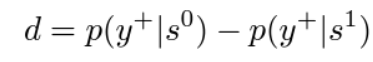



The unexplained difference formula:


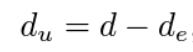



The explained difference formula:



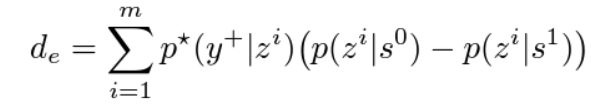


The desired acceptance rate formula:

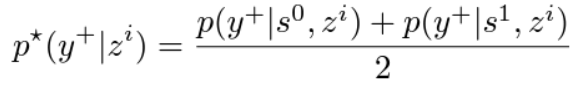

In [60]:
def unexplained_difference(column,protected,general, explainer):
    prot = data[data[column] == protected]
    gen = data[data[column] == general]

    exp = data[data[column] == explainer]

    d = gen['target'].sum()/len(gen) - prot['target'].sum()/len(prot)
    d_e = 0
    for explainer_value in set(data[explainer].values):
        p_star_yp_zi = 0
        if gen[gen[explainer] == explainer_value]['target'].sum() > 0:
            p_star_yp_zi += gen[gen[explainer] == explainer_value]['target'].sum()/len(gen[gen[explainer] == explainer_value])
        
        if prot[prot[explainer] == explainer_value]['target'].sum() > 0:
            p_star_yp_zi +=  prot[prot[explainer] == explainer_value]['target'].sum()/len(prot[prot[explainer] == explainer_value])
        
        exp = data[data[explainer] == explainer_value]

        d_e +=  p_star_yp_zi*(len(exp[exp[column] == general])/len(gen) - len(exp[exp[column] == protected])/len(prot))

    return d-d_e

In [61]:
protected_col = 'race'
gen_value = 'White'
races = data[protected_col].unique().tolist()
avg_unexplained = {}
explainers = ['age', 'education']
for explainer in explainers:
    for i in races:
        cur_unexplained_diff = unexplained_difference(protected_col,i,gen_value, explainer)
        print(f'Unexplained difference (excluding {explainer}) between {gen_value} and {i}',cur_unexplained_diff)
        if f'{gen_value} and {i}' not in avg_unexplained:
            avg_unexplained[f'{gen_value} and {i}'] = 0
        avg_unexplained[f'{gen_value} and {i}'] += cur_unexplained_diff

print('---------------------------------------------------------------')
for i in races:
    print(f'Average Unexplained difference (excluding {" ,".join(explainers)}) between {gen_value} and {i}',avg_unexplained[f'{gen_value} and {i}']/len(explainers))

Unexplained difference (excluding age) between White and White 0.0
Unexplained difference (excluding age) between White and Black 0.13335245884657307
Unexplained difference (excluding age) between White and Asian-Pac-Islander -0.011642521364781739
Unexplained difference (excluding age) between White and Amer-Indian-Eskimo 0.12888638828866764
Unexplained difference (excluding age) between White and Other 0.06616221781367827
Unexplained difference (excluding education) between White and White 0.0
Unexplained difference (excluding education) between White and Black 0.05451914671617886
Unexplained difference (excluding education) between White and Asian-Pac-Islander 0.10201388224617276
Unexplained difference (excluding education) between White and Amer-Indian-Eskimo 0.035147546469885535
Unexplained difference (excluding education) between White and Other 0.04729987655176439
---------------------------------------------------------------
Average Unexplained difference (excluding age ,educat

In [62]:
protected_col = 'sex'
gen_value = 'Male'
races = data[protected_col].unique().tolist()
avg_unexplained = {}
explainers = ['age', 'education']
for explainer in explainers:
    for i in races:
        cur_unexplained_diff = unexplained_difference(protected_col,i,gen_value, explainer)
        print(f'Unexplained difference (excluding {explainer}) between {gen_value} and {i}',cur_unexplained_diff)
        if f'{gen_value} and {i}' not in avg_unexplained:
            avg_unexplained[f'{gen_value} and {i}'] = 0
        avg_unexplained[f'{gen_value} and {i}'] += cur_unexplained_diff

print('---------------------------------------------------------------')
for i in races:
    print(f'Average Unexplained difference (excluding {" ,".join(explainers)}) between {gen_value} and {i}',avg_unexplained[f'{gen_value} and {i}']/len(explainers))

Unexplained difference (excluding age) between Male and Male 0.0
Unexplained difference (excluding age) between Male and Female 0.13554767991978472
Unexplained difference (excluding education) between Male and Male 0.0
Unexplained difference (excluding education) between Male and Female 0.17150232547779964
---------------------------------------------------------------
Average Unexplained difference (excluding age ,education) between Male and Male 0.0
Average Unexplained difference (excluding age ,education) between Male and Female 0.15352500269879218


In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
m_NB = GaussianNB()
m_NB.fit(X_train,y_train)

GaussianNB()

In [65]:
y_pred = m_NB.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred)

0.7957127940544193

In [67]:
def fairness_metrics(y_pred,y_true):
    """Calculate fairness for subgroup of population"""
    
    #Confusion Matrix
    cm=confusion_matrix(y_true,y_pred)
    TN, FP, FN, TP = cm.ravel()
    
    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy
    TPR = TP/(TP+FN) # True positive rate
    FPR = FP/(FP+TN) # False positive rate
    FNR = FN/(TP+FN) # False negative rate
    PPP = (TP + FP)/N # % predicted as positive
    
    return np.array([ACC, TPR, FPR, FNR, PPP]) 

In [68]:
fairness_metrics(y_pred,y_test)

array([0.79571279, 0.3049922 , 0.05251307, 0.6950078 , 0.11215527])

In [69]:
pipeline = Pipeline([('scaler',StandardScaler()),('log',LogisticRegression(penalty='l1',C = 0.1,solver='saga',max_iter=400))])

#log = LogisticRegression(penalty='l1',C = 0.1,solver='saga',max_iter=400)
pipeline.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('log',
                 LogisticRegression(C=0.1, max_iter=400, penalty='l1',
                                    solver='saga'))])

In [70]:
y_pred = pipeline.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred)

0.85283459246975

In [72]:
fairness_metrics(y_pred,y_test)

array([0.85283459, 0.59672387, 0.06795336, 0.40327613, 0.19286285])

In [73]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [74]:
y_pred_males = y_pred[X_test[X_test['sex_Male'] == 1].index.tolist()]
y_pred_females = y_pred[X_test[X_test['sex_Male'] == 0].index.tolist()]

In [75]:
y_test_males = y_test.loc[X_test[X_test['sex_Male'] == 1].index]
y_test_females = y_test.loc[X_test[X_test['sex_Male'] == 0].index]

In [76]:
fm_sex_1 = fairness_metrics(y_pred_males,y_test_males)
fm_sex_0 = fairness_metrics(y_pred_females,y_test_females)

In [77]:
fm_sex = fm_sex_0/fm_sex_1

In [78]:
fm_sex

array([1.14045264, 0.858641  , 0.21849343, 1.22105432, 0.30255426])

In [79]:
fm_sex_0

array([0.92916436, 0.52372881, 0.02132064, 0.47627119, 0.07600074])

In [80]:
fm_sex_1

array([0.81473297, 0.60995086, 0.09758022, 0.39004914, 0.25119705])

## Run a classification with a decision tree

In [37]:
# classify data
clf =   DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
pred_Y = clf.predict(X_test)

# scores
print(precision_recall_fscore_support(y_test, pred_Y, average="macro"))
print(precision_recall_fscore_support(y_test, pred_Y, average="micro"))
accuracy_score(y_test, pred_Y)

(0.82183246794805, 0.7686715695407068, 0.789699191326495, None)
(0.8602051471039862, 0.8602051471039862, 0.8602051471039862, None)


0.8602051471039862

## Calculate the consistency measure

In [38]:
# we use sklearn to find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=11) # the first neighbour is always the data itself, therefore take 11 neighbours
nbrs = neigh.fit(X_test)
distances, indices = nbrs.kneighbors(X_test)

In [39]:
# calculate C
sum = 0
for i in range(len(indices)):
    for j in range(11):
        sum += np.abs(int(pred_Y[i])-int(pred_Y[indices[i][j]]))
result = 1 - sum*(1/(10*len(indices)))
print(result)

0.7627725569682452
